In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# paths for the three dfs

df_jan_path = "/Users/aniket_ml/Documents/data/yellow_tripdata_2016-01.csv"
df_feb_path = "/Users/aniket_ml/Documents/data/yellow_tripdata_2016-02.csv"
df_mar_path = "/Users/aniket_ml/Documents/data/yellow_tripdata_2016-03.csv"

# load the dataframes
import dask.dataframe as dd

df_jan = dd.read_csv(df_jan_path, assume_missing=True)
df_feb = dd.read_csv(df_feb_path, assume_missing=True)
df_mar = dd.read_csv(df_mar_path, assume_missing=True)


In [3]:
# print any one of the dataframe
# os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"
df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
npartitions=26,,,,,,,,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


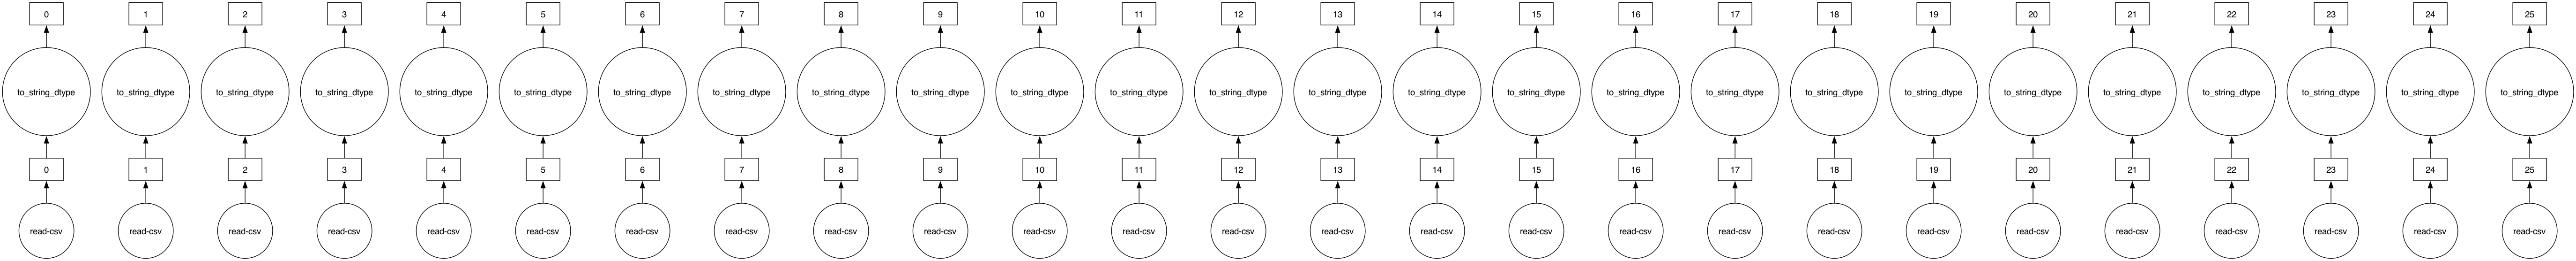

In [4]:
# visualize the chunks using the task graph
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

df_jan.visualize(tasks=True)

In [5]:
# shape of all the three datasets

print("Shape of january dataset", df_jan.shape)
print("Shape of february dataset", df_feb.shape)
print("Shape of march dataset", df_mar.shape)

Shape of january dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(994692a)).size() // 19, dtype=int64>, 19)
Shape of february dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(a29dcab)).size() // 19, dtype=int64>, 19)
Shape of march dataset (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(e598a39)).size() // 19, dtype=int64>, 19)


In [6]:
# concat the three dataframes as one

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0).drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type'])

In [7]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=82,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


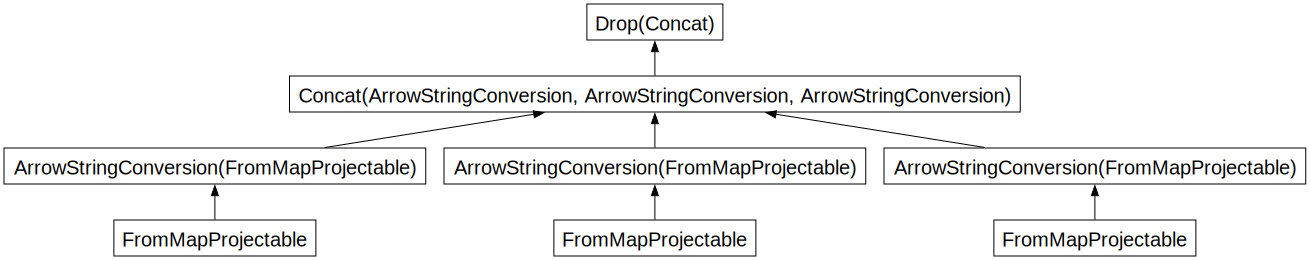

In [8]:
# visulaize the concatenation

df_final.visualize()

In [9]:
# columns in the final dataset

df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [10]:
# print top ten rows

df_final.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,7.5
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,18.0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,33.0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,16.5
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,8.0
5,2.0,2016-01-01 00:00:00,2016-01-01 00:18:30,2.0,5.52,-73.980118,40.743050,1.0,N,-73.913490,40.763142,19.0
6,2.0,2016-01-01 00:00:00,2016-01-01 00:26:45,2.0,7.45,-73.994057,40.719990,1.0,N,-73.966362,40.789871,26.0
7,1.0,2016-01-01 00:00:01,2016-01-01 00:11:55,1.0,1.20,-73.979424,40.744614,1.0,N,-73.992035,40.753944,9.0
8,1.0,2016-01-01 00:00:02,2016-01-01 00:11:14,1.0,6.00,-73.947151,40.791046,1.0,N,-73.920769,40.865578,18.0
9,2.0,2016-01-01 00:00:02,2016-01-01 00:11:08,1.0,3.21,-73.998344,40.723896,1.0,N,-73.995850,40.688400,11.5


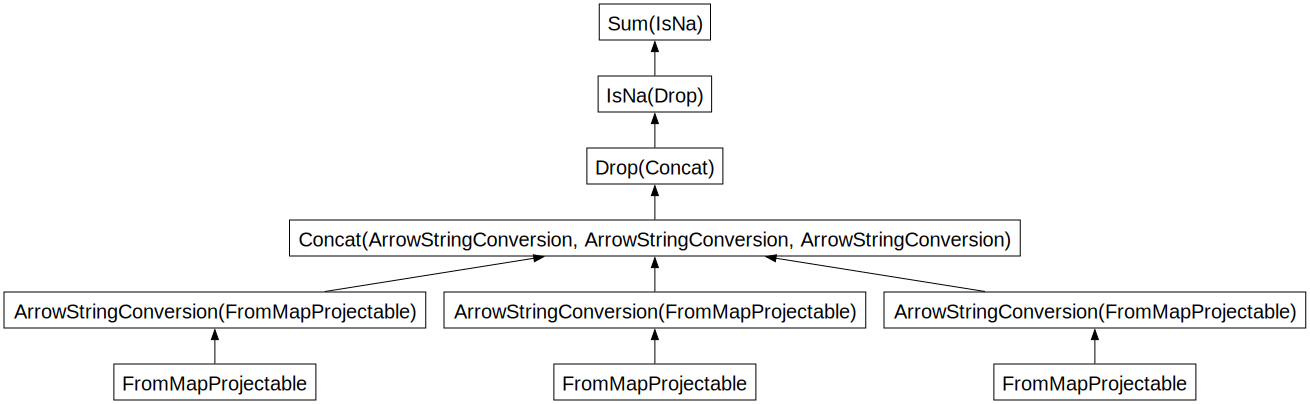

In [11]:
df_final.isna().sum().visualize()

In [12]:
	
# check for missing values in the data

df_final.isna().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [23]:
# datatypes

df_final.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [24]:
sns.set_style("whitegrid")

In [25]:
# statistical summary of numerical columns

df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05


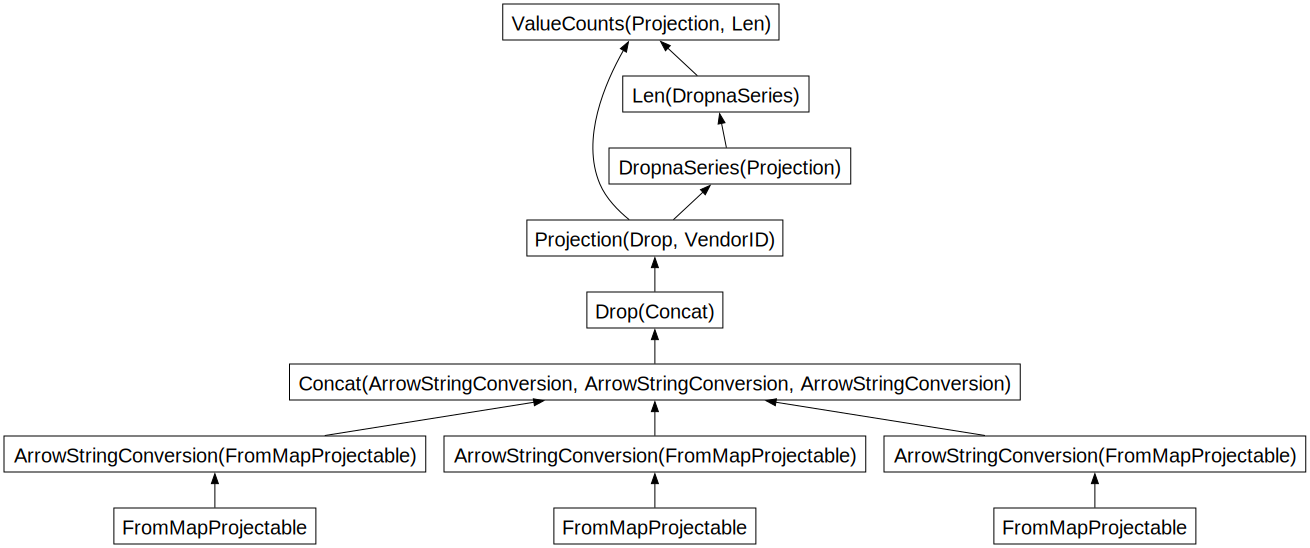

In [26]:

df_final["VendorID"].value_counts(normalize=True).visualize()

In [27]:

# pie chart of vendor share in NYC

vendor_share = (
    df_final["VendorID"]
    .value_counts(normalize=True)
    .compute()
)

In [28]:
type(vendor_share)

pandas.core.series.Series

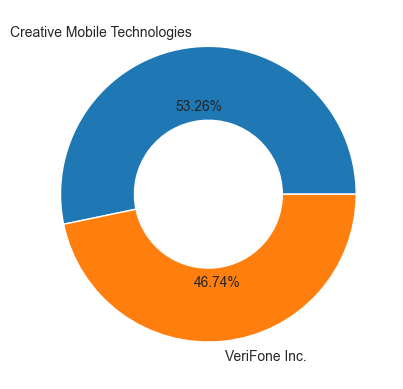

In [29]:
# donut chart

plt.pie(vendor_share, labels=["Creative Mobile Technologies","VeriFone Inc."], autopct="%.2f%%",
       radius=1, wedgeprops=dict(width=0.5, edgecolor="w"))
plt.show()

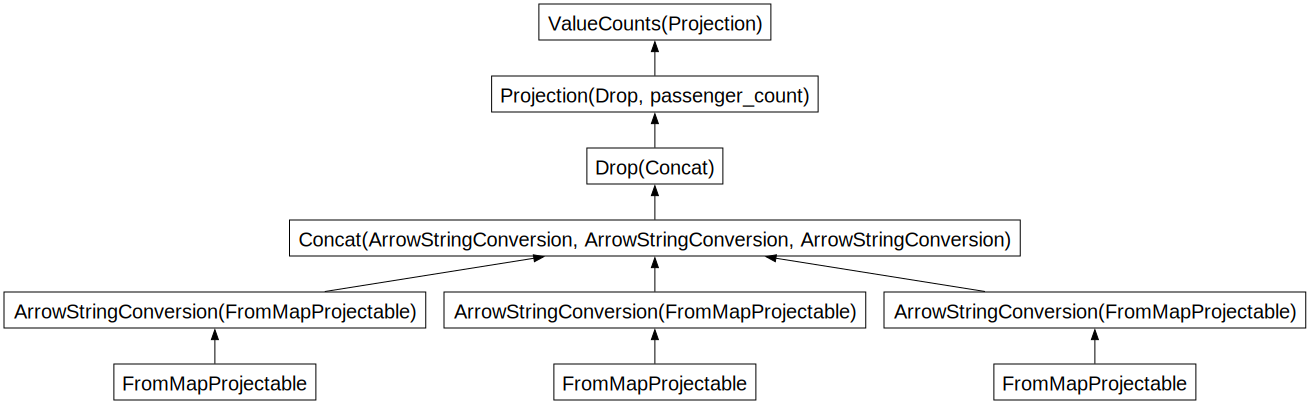

In [30]:
df_final["passenger_count"].value_counts().visualize()

In [31]:
# countplot for passenger plot

passenger_count = df_final["passenger_count"].value_counts().compute()

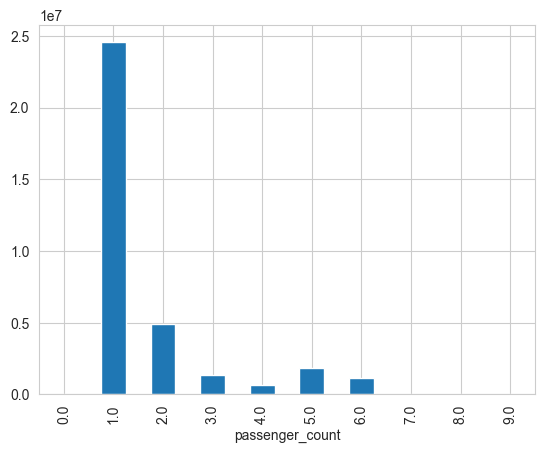

In [32]:
passenger_count.sort_index().plot(kind="bar")
plt.show()

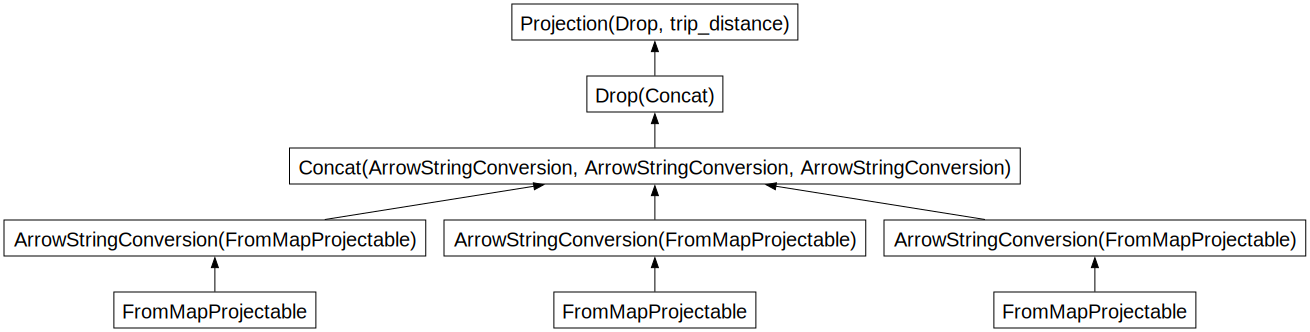

In [33]:
df_final.loc[:,"trip_distance"].visualize()

<Axes: ylabel='trip_distance'>

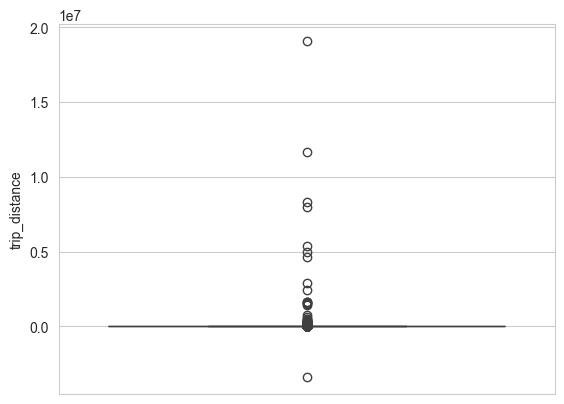

In [34]:
# boxplot for the trip distance

sns.boxplot(df_final.loc[:,"trip_distance"].compute())

In [35]:
df_final["trip_distance"]

Dask Series Structure:
npartitions=82
    float64
        ...
     ...   
        ...
        ...
Dask Name: getitem, 9 expressions
Expr=(Drop(frame=Concat(frames=[ArrowStringConversion(frame=FromMapProjectable(994692a)), ArrowStringConversion(frame=FromMapProjectable(a29dcab)), ArrowStringConversion(frame=FromMapProjectable(e598a39))], ), columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type']))['trip_distance']

In [36]:
percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [37]:
# percentile values for trip distance

percentile_values = np.arange(0.1,1.0,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")

The trip distance value for 10th percentile is 0.7
The trip distance value for 20th percentile is 0.97
The trip distance value for 30th percentile is 1.23
The trip distance value for 40th percentile is 1.56
The trip distance value for 50th percentile is 1.93
The trip distance value for 60th percentile is 2.49
The trip distance value for 70th percentile is 3.27
The trip distance value for 80th percentile is 4.6
The trip distance value for 90th percentile is 8.3


In [38]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [39]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()}")


The trip distance value for 90th percentile is 8.3
The trip distance value for 91th percentile is 8.91
The trip distance value for 92th percentile is 9.53
The trip distance value for 93th percentile is 10.2
The trip distance value for 94th percentile is 10.95
The trip distance value for 95th percentile is 12.1
The trip distance value for 96th percentile is 14.680000000000582
The trip distance value for 97th percentile is 16.91
The trip distance value for 98th percentile is 17.95
The trip distance value for 99th percentile is 19.375500000000464
The trip distance value for 100th percentile is 19072628.8


<Axes: ylabel='fare_amount'>

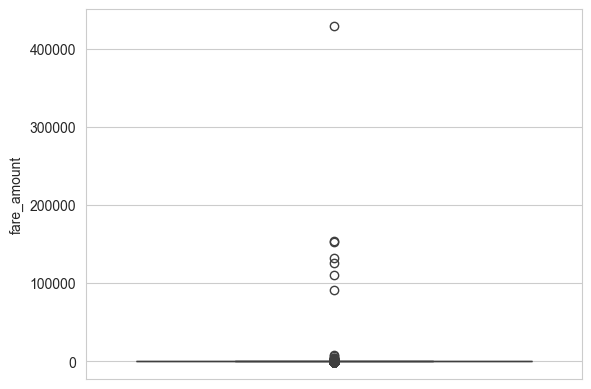

In [40]:
# boxplot for the fare amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute())

In [41]:
# percentile values for fare amount

percentile_values = np.arange(0.1,1.1,0.1)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")

The fare amount value for 10th percentile is 5.0
The fare amount value for 20th percentile is 6.0
The fare amount value for 30th percentile is 7.5
The fare amount value for 40th percentile is 8.5
The fare amount value for 50th percentile is 10.0
The fare amount value for 60th percentile is 11.5
The fare amount value for 70th percentile is 14.0
The fare amount value for 80th percentile is 18.0
The fare amount value for 90th percentile is 27.0
The fare amount value for 100th percentile is 429496.72


In [42]:
percentile_values = np.arange(0.90,1.01,0.01)
percentile_values

for percentile in percentile_values:
    print(f"The fare amount value for {int(percentile * 100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")

The fare amount value for 90th percentile is 27.0
The fare amount value for 91th percentile is 29.0
The fare amount value for 92th percentile is 30.5
The fare amount value for 93th percentile is 33.0
The fare amount value for 94th percentile is 35.5
The fare amount value for 95th percentile is 40.0
The fare amount value for 96th percentile is 49.5
The fare amount value for 97th percentile is 52.0
The fare amount value for 98th percentile is 52.0
The fare amount value for 99th percentile is 52.0
The fare amount value for 100th percentile is 429496.72


In [43]:
# unique values

rate_code_ids = (
    df_final.loc[:,"RatecodeID"]
    .value_counts()
    .compute()
)

In [44]:
rate_code_ids.sort_index()

RatecodeID
1.0     33627000
2.0       697595
3.0        56169
4.0        14459
5.0       103481
6.0          320
99.0         835
Name: count, dtype: int64

In [45]:

print(rate_code_ids.sort_index().index.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]


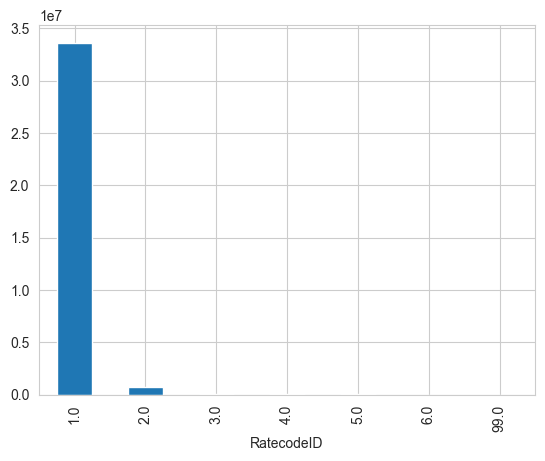

In [46]:
# plot the bar plot to display the distribution of categories

rate_code_ids.sort_index().plot(kind="bar")
plt.show()

In [47]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude', 
                           'dropoff_latitude','dropoff_longitude']]

location_subset

ImportError: Dask diagnostics requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[diagnostics]" --upgrade  # or python -m pip install

Dask DataFrame Structure:
               pickup_latitude pickup_longitude dropoff_latitude dropoff_longitude
npartitions=82                                                                    
                       float64          float64          float64           float64
                           ...              ...              ...               ...
...                        ...              ...              ...               ...
                           ...              ...              ...               ...
                           ...              ...              ...               ...
Dask Name: getitem, 9 expressions
Expr=(Drop(frame=Concat(frames=[ArrowStringConversion(frame=FromMapProjectable(994692a)), ArrowStringConversion(frame=FromMapProjectable(a29dcab)), ArrowStringConversion(frame=FromMapProjectable(e598a39))], ), columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type']))[['pickup_latitude', 'pickup_lon

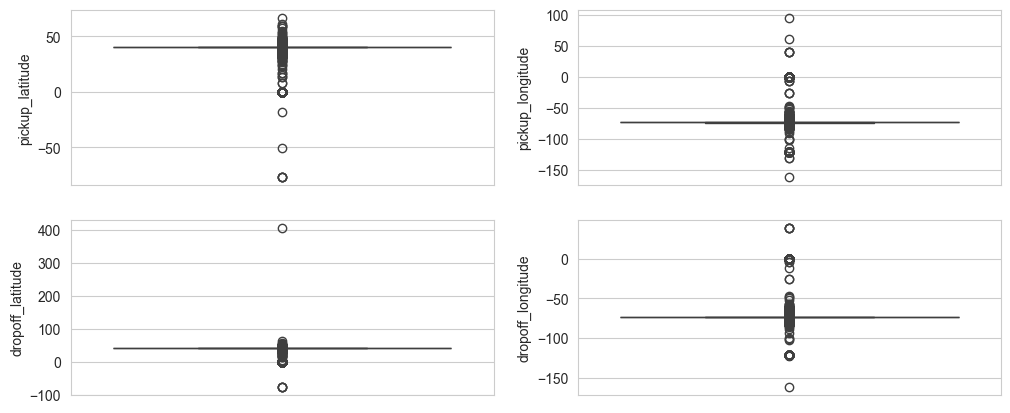

In [48]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i])
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2])

<Axes: xlabel='count', ylabel='store_and_fwd_flag'>

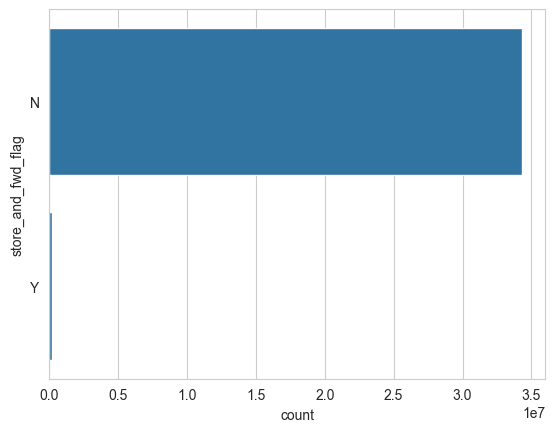

In [49]:
# count plot

sns.countplot(df_final["store_and_fwd_flag"].compute())

In [50]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [51]:
# convert the columns to datetime

df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"], yearfirst=True, format="mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"], yearfirst=True, format="mixed")


In [52]:
# create new columns

df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour

In [13]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
npartitions=82,,,,,,,,,,,,
,float64,string,string,float64,float64,float64,float64,float64,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...


In [54]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'pickup_months',
       'pickup_day_of_week', 'pickup_hour'],
      dtype='object')

In [55]:
df_final.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
pickup_months                      int32
pickup_day_of_week                 int32
pickup_hour                        int32
dtype: object

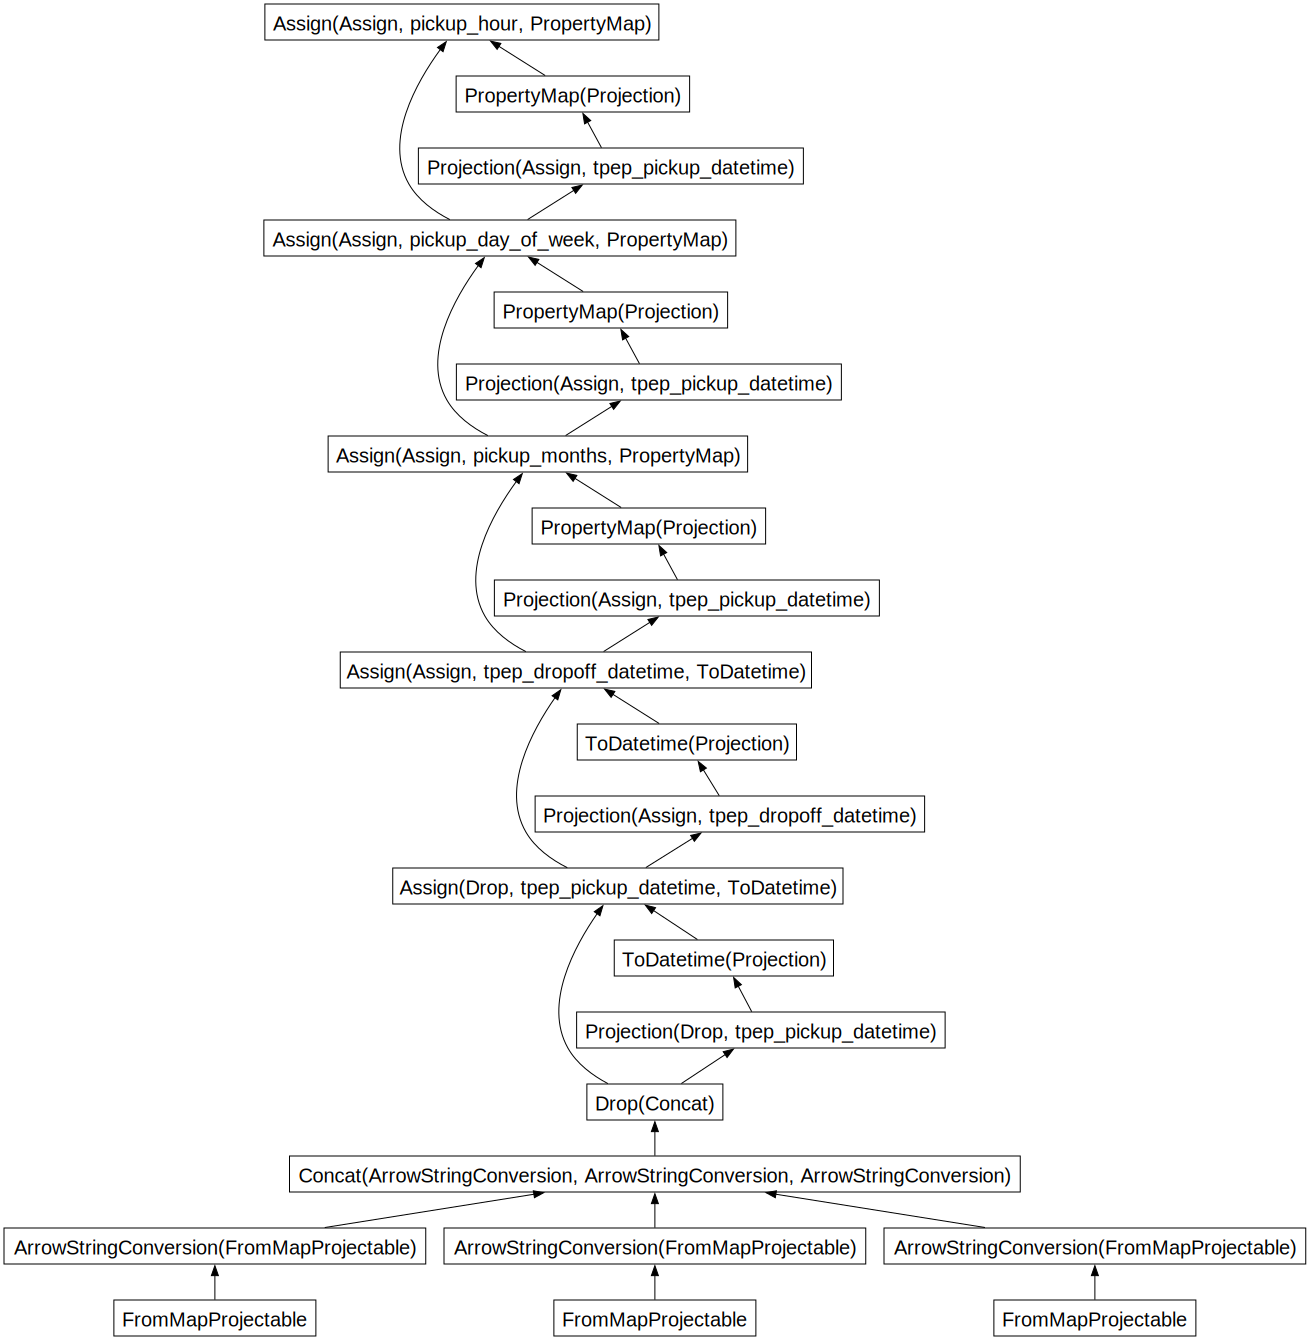

In [56]:
df_final.visualize()

In [57]:
# plot the number of pickups

pickups_every_3_days = (
                            df_final
                            .set_index('tpep_pickup_datetime')
                            .resample("3D")
                            .size()
                            .compute()
)

In [58]:
pickups_every_3_days

tpep_pickup_datetime
2016-01-01     960746
2016-01-04    1007938
2016-01-07    1162789
2016-01-10    1061829
2016-01-13    1192852
2016-01-16    1132536
2016-01-19    1166946
2016-01-22     658061
2016-01-25     968922
2016-01-28    1232734
2016-01-31    1065990
2016-02-03    1176173
2016-02-06    1144752
2016-02-09    1192598
2016-02-12    1285409
2016-02-15    1101217
2016-02-18    1256220
2016-02-21    1114674
2016-02-24    1251497
2016-02-27    1155024
2016-03-01    1208179
2016-03-04    1270530
2016-03-07    1106194
2016-03-10    1273983
2016-03-13    1134075
2016-03-16    1234570
2016-03-19    1176151
2016-03-22    1155525
2016-03-25    1149227
2016-03-28    1108463
2016-03-31     394055
Freq: 3D, dtype: int64

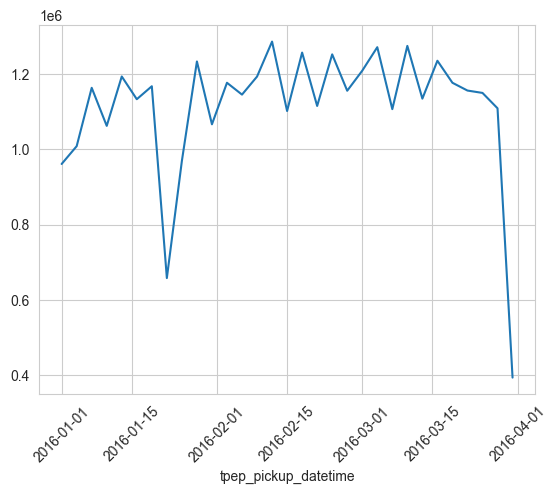

In [59]:
# plot the graph of pickups

sns.lineplot(pickups_every_3_days)
plt.xticks(rotation=45)
plt.show()

In [60]:
# pickups for each hour of the day

pickups_each_hour = (
    df_final
    .groupby(["pickup_hour","pickup_day_of_week"])["VendorID"]
    .count()
    .compute()
)

In [61]:
pickups_each_hour

pickup_hour  pickup_day_of_week
4            2                      29498
             3                      32480
5            2                      49844
6            2                     136330
             3                     138392
                                    ...  
23           5                     299024
0            0                     100903
             1                     101299
19           0                     291911
23           0                     154325
Name: VendorID, Length: 168, dtype: int64

In [62]:
pickups_each_hour = pickups_each_hour.reset_index()

In [63]:
pickups_each_hour.rename(columns={"VendorID":"Number of Pickups"},inplace=True)

In [ ]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
#corrected

replacement_mapper = {k:v for k,v in enumerate(day_names)}

replacement_mapper

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [65]:
pickups_each_hour.replace({"pickup_day_of_week":replacement_mapper},inplace=True)

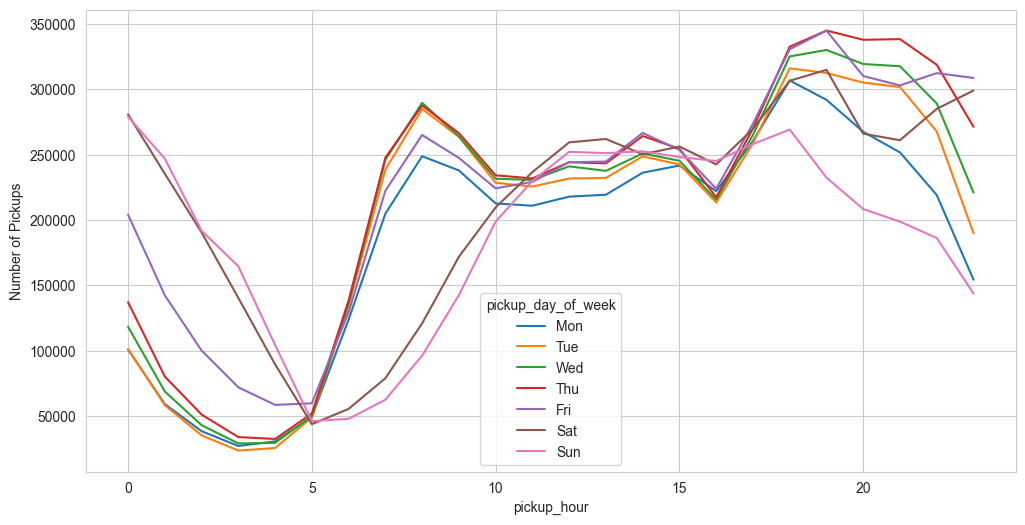

In [66]:
# plot the lineplot

fig = plt.figure(figsize=(12,6))

sns.lineplot(pickups_each_hour, x="pickup_hour", y="Number of Pickups", 
             hue="pickup_day_of_week",hue_order=day_names)

plt.show()